# Function Transformations
log transform
reciprocal transform
power transform
box cox transform
these transformation's make the model optimized
these transformation makes the sample simmilar to normal distribution

how to whether the given dataset is normally distributed?
sns.distplot
QQ_plot-> if normal straight line with 45* 
pd.skew()-> != 0 (if 0 normal)

# Log Transform

Take log of all the values ,these values converges to normal
applied on right skewed values -> centers the distribution

# Reciprocal Transform

1/x of all the values (useful in some senarios)

# square transform

useful on left skewed data   


In [4]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [8]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=42,test_size=0.2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9624\413686869.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


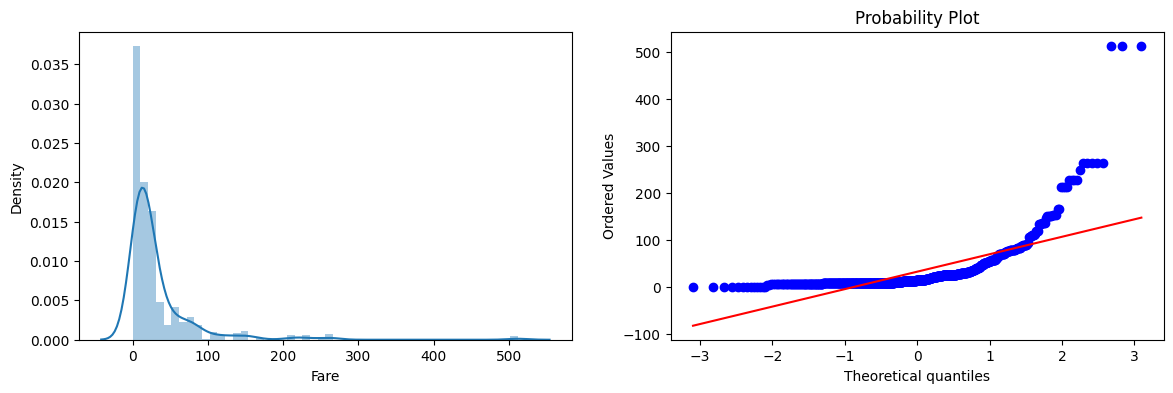

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
import seaborn as sns
sns.distplot(X_train['Fare'])
plt.subplot(122)
stats.probplot(X_train['Fare'],plot=plt)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9624\1187500897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


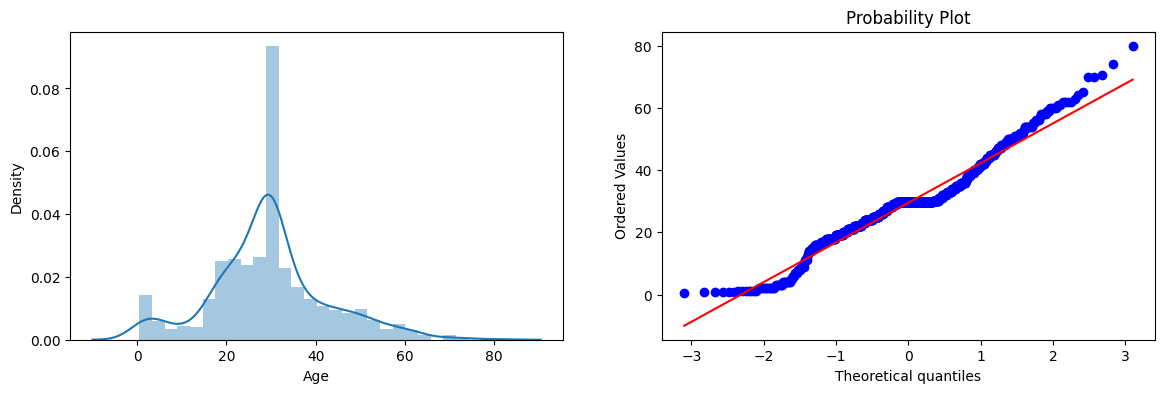

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.show()


In [11]:
model=LogisticRegression()
model2=DecisionTreeClassifier()
model.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
res1=model.predict(X_test)
res2=model2.predict(X_test)
print(accuracy_score(res1,Y_test))
print(accuracy_score(res2,Y_test))

0.6480446927374302
0.664804469273743


In [12]:
trf=FunctionTransformer(func=np.log1p)
X_train=trf.fit_transform(X_train)
X_test=trf.transform(X_test)
model.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
res1=model.predict(X_test)
res2=model2.predict(X_test)
print(accuracy_score(res1,Y_test))
print(accuracy_score(res2,Y_test))

0.6815642458100558
0.6927374301675978
